<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных-к-анализу" data-toc-modified-id="Загрузка-и-подготовка-данных-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных к анализу</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Cоотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Cоотношение-сетевых-и-несетевых-заведений-по-количеству-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cоотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Сетевое-распространение-по-видам-объектов" data-toc-modified-id="Сетевое-распространение-по-видам-объектов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сетевое распространение по видам объектов</a></span></li><li><span><a href="#Характер-посадочный-мест-сетевых-заведений" data-toc-modified-id="Характер-посадочный-мест-сетевых-заведений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Характер посадочный мест сетевых заведений</a></span></li><li><span><a href="#Cреднее-количество-посадочных-мест-для-каждого-вида-объекта" data-toc-modified-id="Cреднее-количество-посадочных-мест-для-каждого-вида-объекта-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Cреднее количество посадочных мест для каждого вида объекта</a></span></li><li><span><a href="#Информацию-об-улице-заведения" data-toc-modified-id="Информацию-об-улице-заведения-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Информацию об улице заведения</a></span></li><li><span><a href="#Районы-Москвы" data-toc-modified-id="Районы-Москвы-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Районы Москвы</a></span></li><li><span><a href="#Число-улиц-с-одним-объектом-общественного-питания" data-toc-modified-id="Число-улиц-с-одним-объектом-общественного-питания-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Число улиц с одним объектом общественного питания</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рынок заведений общественного питания Москвы

## Введение

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

Описание данных:

Таблица rest_data:

    id — идентификатор объекта;
    object_name — название объекта общественного питания;
    chain — сетевой ресторан;
    object_type — тип объекта общественного питания;
    address — адрес;
    number — количество посадочных мест.

## Загрузка и подготовка данных к анализу

In [1]:
# импортирую необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objects as go
%config InlineBackend.figure_format = 'retina'
import re

In [2]:
# загружаю данные
rest = pd.read_csv('/datasets/rest_data.csv')

In [3]:
rest.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
# уберем из названий слова "кафе","пиццерия", "ресторан"
rest['object_name']=rest['object_name'].replace(regex=["ресторан "
                                                       , "кафе "
                                                       , "пиццерия "
                                                       , 'кофейня '
                                                       , 'КАФЕ'
                                                       , 'Кафе'
                                                       , '«'
                                                       , '»'
                                                       , 'кальян-бар'
                                                       , 'кальян- бар'
                                                       , 'паб'
                                                       , 'бар'
                                                       , ' стейк-хауз'
                                                      ], value='')

In [5]:
rest['object_name']=rest['object_name'].replace({'сабвей': 'subway', 
                                             'старбакс': 'starbucks', 'pizza express': 'пицца экспресс', 
                                             'baskin robbins': 'баскин роббинс', 'pizza hut': 'пицца хат', 
                                             'кофикс': 'cofix', 'dominos pizza': "домино'с пицца", 'mcdonalds': 'макдоналдс', 
                                             'бургер кинг': 'burger king', 'il patio': 'иль патио', 'prime star': 'прайм стар',
                                             'коста кофе': 'costa coffee'})

In [6]:
# приведем все названия к нижнему регистру
rest['object_name']=rest['object_name'].str.lower()

In [7]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [8]:
rest.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [9]:
rest.duplicated().sum()

0

In [10]:
rest.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

Проверим на неявные дубликаты в колонке id и address

In [11]:
print('дубликатов в колонке id:', rest['id'].duplicated().sum())
print('дубликатов в колонке адрес:', rest['address'].duplicated().sum())

дубликатов в колонке id: 0
дубликатов в колонке адрес: 6258


In [12]:
#поищем дубликаты где повторяется не только улица, но и название и тип объекта и количество посадочных мест
rest_dup = rest[rest.duplicated(subset=['address','object_name','object_type', 'number'], keep=False)]
rest_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 2374 to 15217
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           150 non-null    int64 
 1   object_name  150 non-null    object
 2   chain        150 non-null    object
 3   object_type  150 non-null    object
 4   address      150 non-null    object
 5   number       150 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 8.2+ KB


In [13]:
rest_dup.head(10)

,id,object_name,chain,object_type,address,number
2374,28603,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2869,25031,laltro bosco,нет,ресторан,"город Москва, улица Петровка, дом 10",145
3396,19814,буфет коникс-школьник,нет,буфет,"город Москва, улица Удальцова, дом 21",100
3397,71896,буфет коникс-школьник,нет,буфет,"город Москва, улица Удальцова, дом 21",100
3480,20913,буфет мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
3481,20914,буфет мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4430,23741,столовая гбоу города москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4536,23381,столовая комбинат питания космос,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15


уже больше похоже на правду, результаты задваиваются по нескольким столбцам, удалим их

In [14]:
rest[['address','object_name','object_type', 'number']]=rest[['address','object_name','object_type', 'number']].drop_duplicates()
rest = rest.dropna().reset_index(drop = True)
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15281 entries, 0 to 15280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           15281 non-null  int64  
 1   object_name  15281 non-null  object 
 2   chain        15281 non-null  object 
 3   object_type  15281 non-null  object 
 4   address      15281 non-null  object 
 5   number       15281 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 716.4+ KB


Данные без пропусков и без дубликатов, у всех колонок нужный тип данных, названия столбцев уже в змеином регистре. Можно приступать к анализу данных

## Анализ данных

### Соотношение видов объектов общественного питания по количеству

In [15]:
sns.set_style("darkgrid")

In [16]:
# сводная таблица количества заведений по типу объекта
sort = rest['object_type'].value_counts().reset_index()
sort.columns = ["type","count"]
display(sort)

,type,count
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


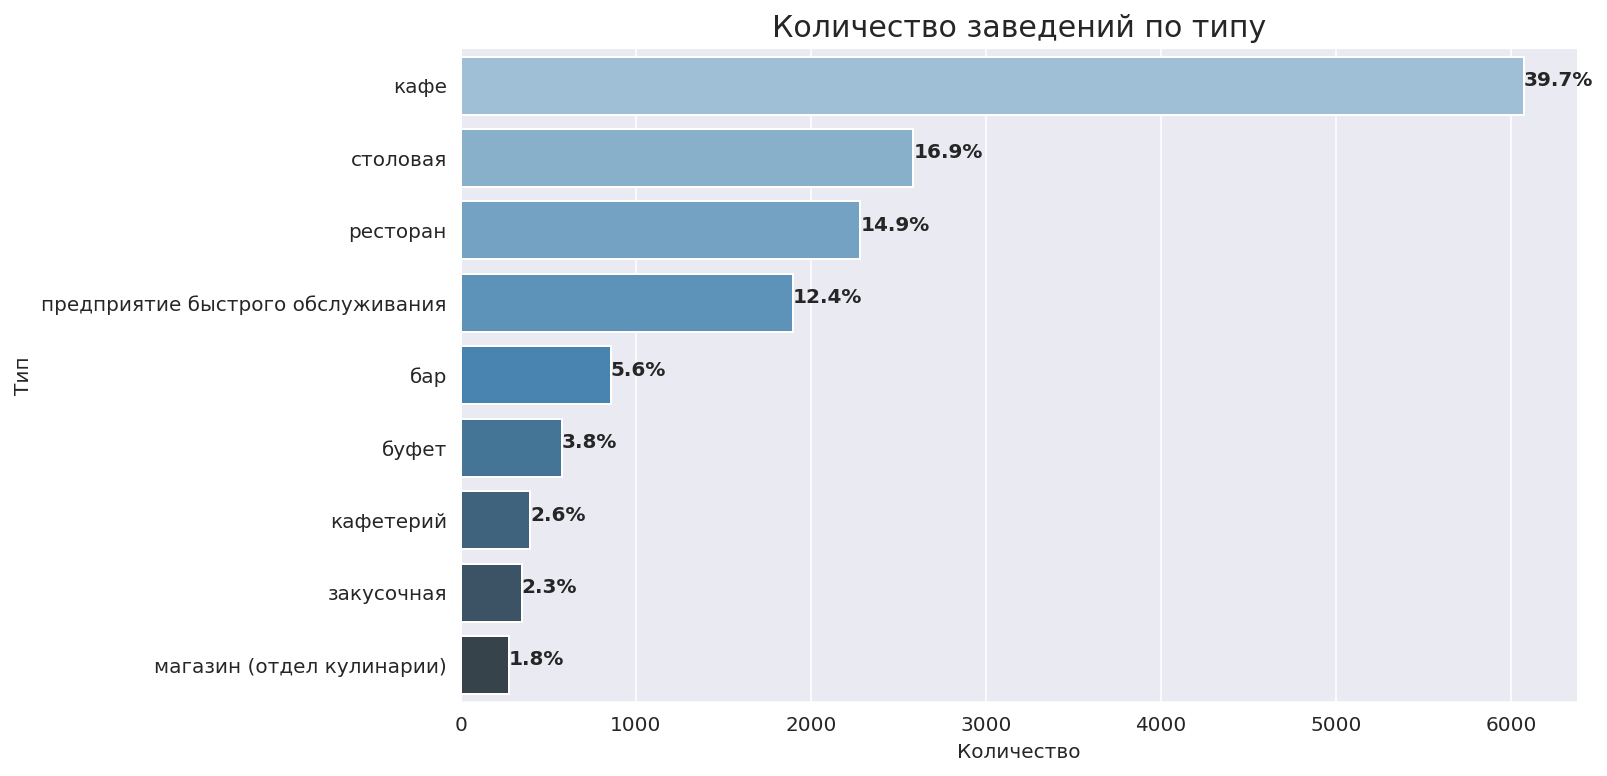

In [17]:
# график соотношений типов объектов
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(y="object_type", data=rest, order=sort['type'], palette="Blues_d")

ax.set_title("Количество заведений по типу", fontsize=15)
ax.set_xlabel ("Количество")
ax.set_ylabel ("Тип")

sns.despine()

# вывод %
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% (rect.get_width()/len(rest)*100), weight='bold' )

Перед нами соотношение долей типов общепита. На графике наглядно видно, что больше всего в Москве: кафе, столовая, ресторан и фастфуд.

### Cоотношение сетевых и несетевых заведений по количеству

In [18]:
# посмотрим соотношение сетевых и не сетевых заведений
share_chain = rest['chain'].value_counts().to_frame()
share_chain

,chain
нет,12317
да,2964


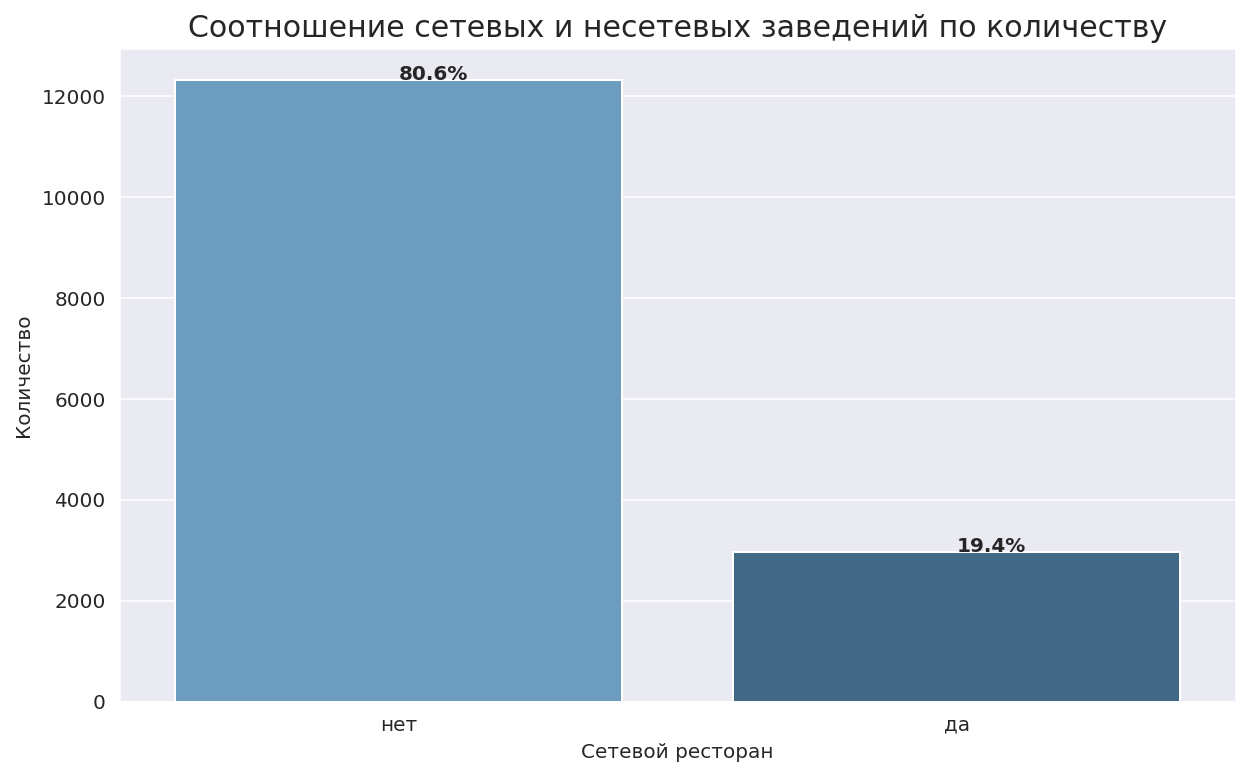

In [19]:
# график соотношения

bar,ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x="chain", data=rest, palette="Blues_d")

ax.set_title("Соотношение сетевых и несетевых заведений по количеству", fontsize=15)
ax.set_xlabel("Сетевой ресторан")
ax.set_ylabel("Количество")

# вывод %
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), "%.1f%%"% (rect.get_height()/len(rest)*100), weight='bold')

Не сетевые заведения преобладают, тогда как сетевых заведений меньше 20% от общей суммы.

###  Сетевое распространение по видам объектов

In [20]:
# долю сетевых заведений для каждого типа:

rest['chain'] = rest['chain'].replace({'да':1,'нет':0})
rest['chain'] = rest['chain'].astype('bool')
chain_type = rest.groupby('object_type')['chain'].mean().sort_values(ascending=False).reset_index().round(2)
chain_type['chain'] = chain_type['chain']*100
chain_type

,object_type,chain
0,предприятие быстрого обслуживания,42.0
1,магазин (отдел кулинарии),29.0
2,ресторан,24.0
3,кафе,23.0
4,закусочная,16.0
5,кафетерий,13.0
6,бар,4.0
7,буфет,2.0
8,столовая,0.0


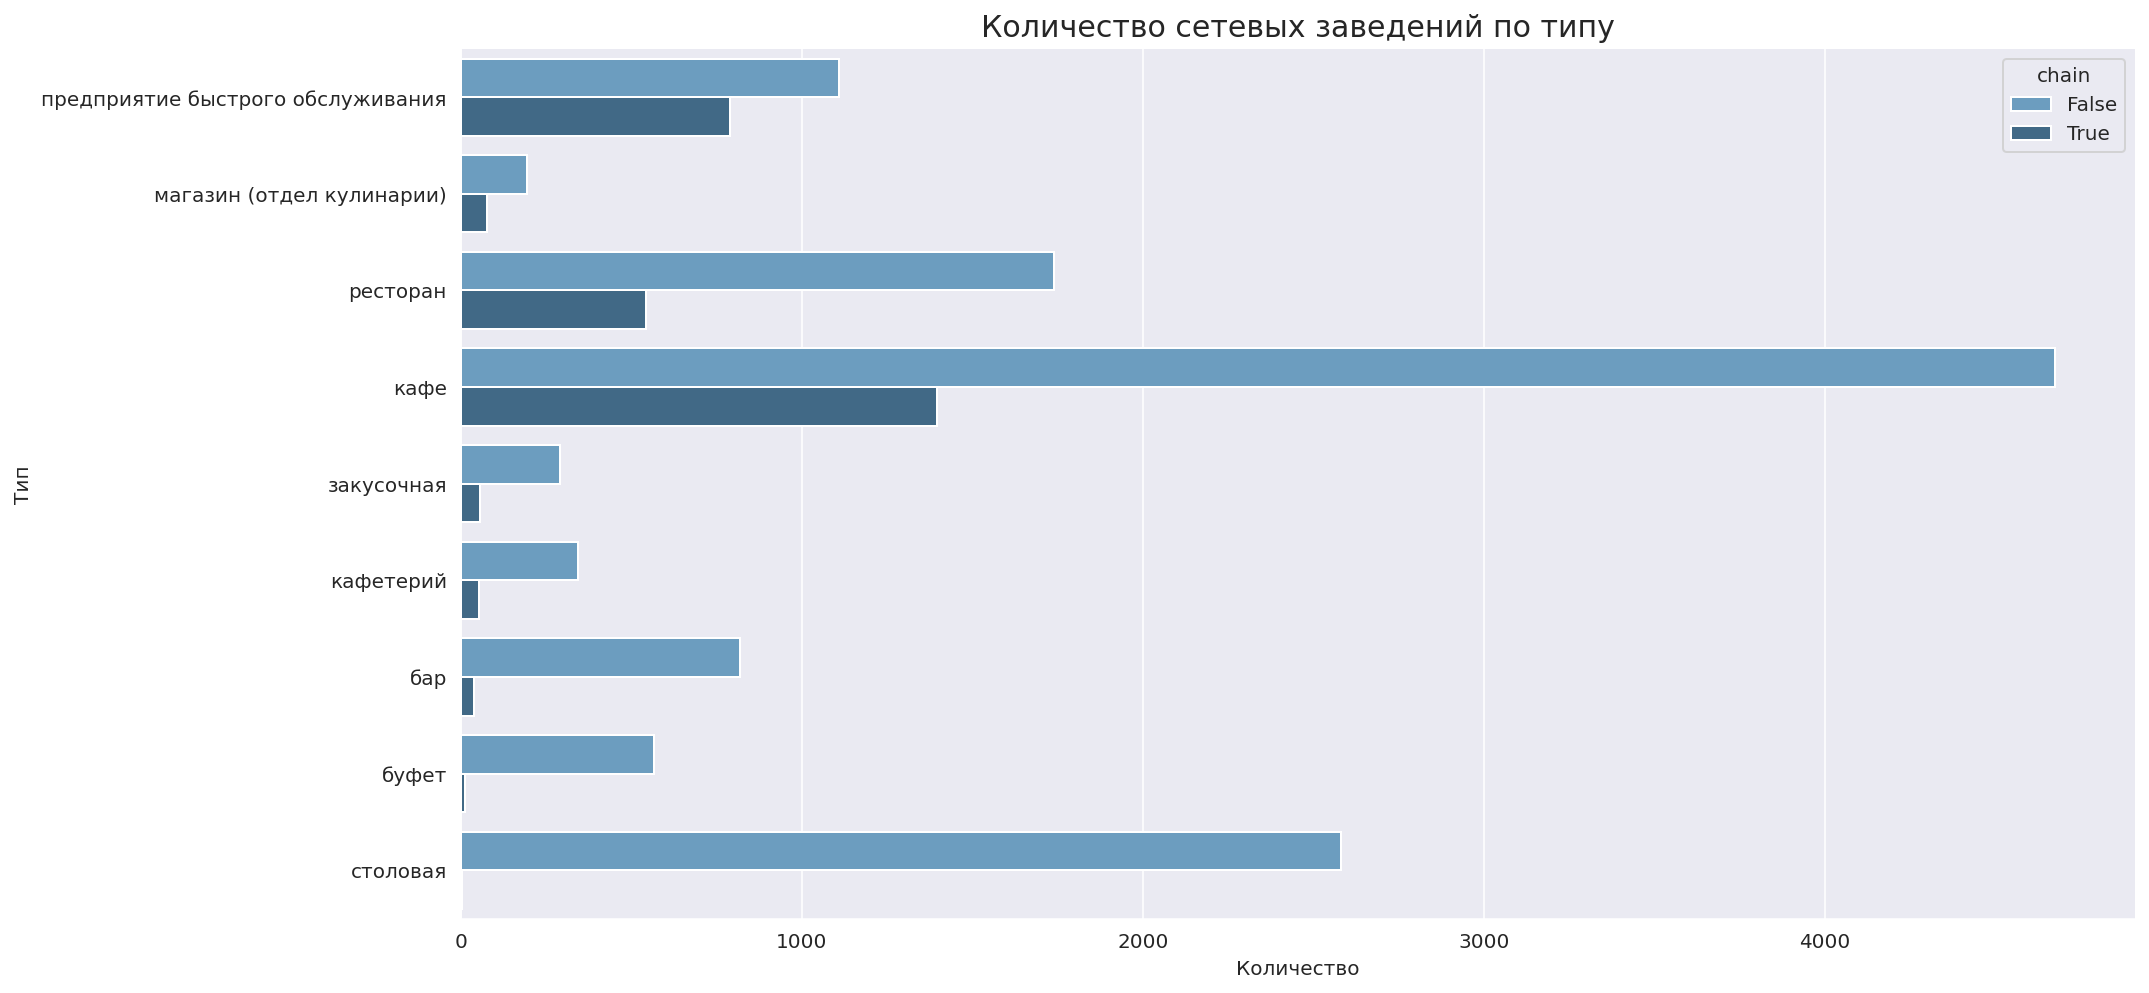

In [21]:
# график сетевого распространения по видам объектов среди всех типов
#chain = rest.query('chain == "да"')

bar,ax = plt.subplots(figsize=(15,8))
ax = sns.countplot(y="object_type", hue='chain', data=rest, order = chain_type['object_type'], palette="Blues_d")

ax.set_title("Количество сетевых заведений по типу", fontsize=15)
ax.set_xlabel ("Количество", fontsize=10)
ax.set_ylabel ("Тип", fontsize=10)

sns.despine()

Text(0, 0.5, 'Тип объекта')

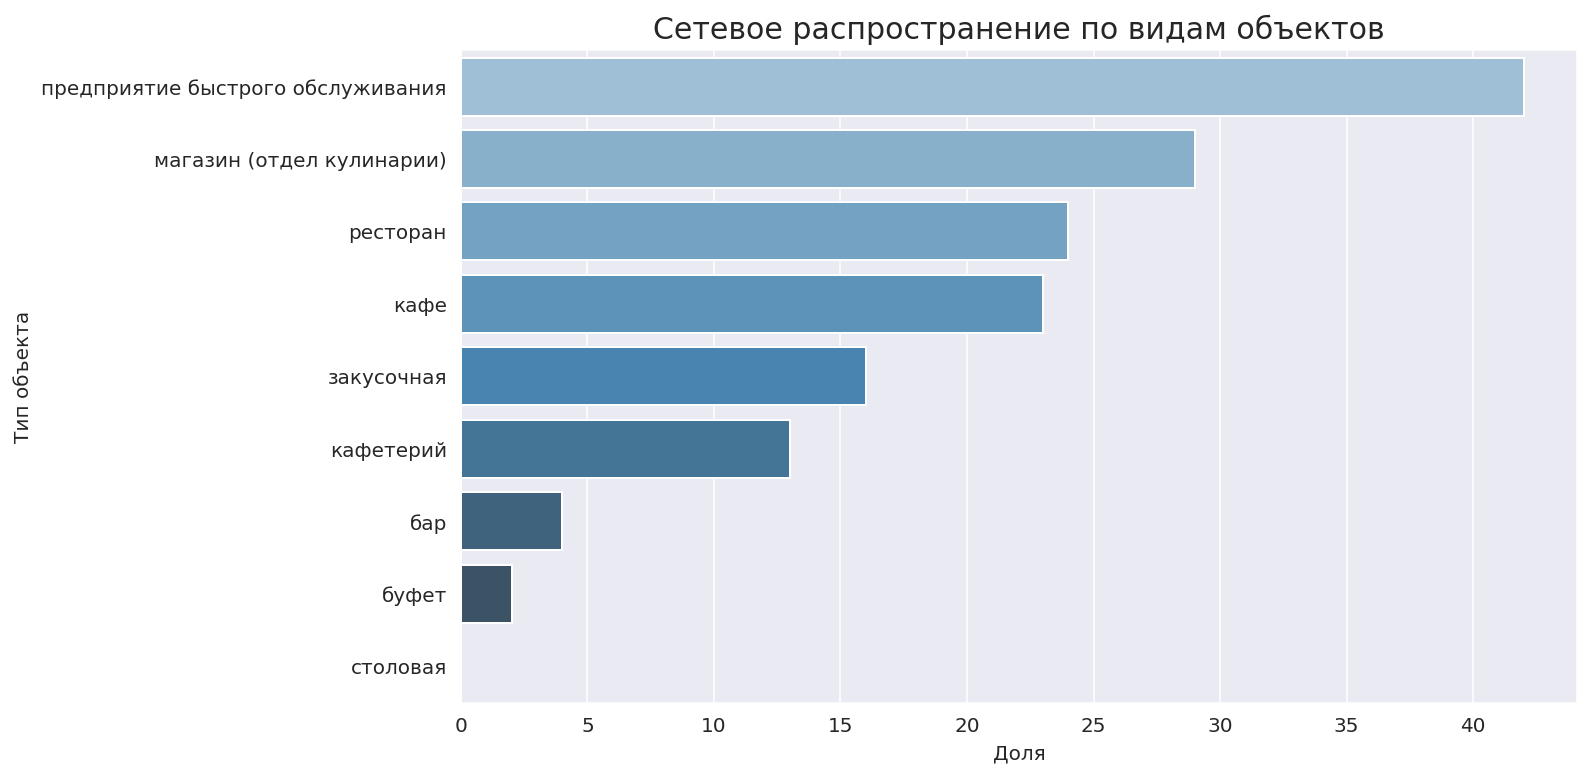

In [22]:
# график сетевого распространения по видам объектов

bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data = chain_type, x = 'chain',y='object_type', palette="Blues_d")


ax.set_title("Сетевое распространение по видам объектов", fontsize=15)
ax.set_xlabel("Доля")
#bar.autofmt_xdate(rotation=45)
ax.set_ylabel("Тип объекта")

Для фаст фуда характернее всего сетевые заведения(более 40%), а так же для кулирнарии, ресторанов и кафе. Бары, буфеты и столовые сетевыми почти не бывают.

Среди сетевых заведений тип "кафе" занимает почти половину рынка!, значительную долю занимает фаст фуд и рестораны. Также тоит отметить, что для столовых, которые были в лидерах без учета сети, опустились на последнее место. Значит, почти нет сетевых столовых.

### Характер посадочный мест сетевых заведений

In [23]:
# группировка данных по количеству посадочных мест
chain = rest.query('chain == True') #оставляем только сетевые заведения

In [24]:
max_seats = (chain.groupby('object_type')
             .agg({'id':'count', 'number': 'max'})
             .sort_values(by =  'id', ascending=False)
             .reset_index()
             .rename(columns = {'id':'count', 'number': 'seats'}))
max_seats

,object_type,count,seats
0,кафе,1396,456.0
1,предприятие быстрого обслуживания,788,580.0
2,ресторан,543,500.0
3,магазин (отдел кулинарии),78,48.0
4,закусочная,56,91.0
5,кафетерий,52,85.0
6,бар,37,150.0
7,буфет,11,70.0
8,столовая,3,162.0


In [25]:
#групировка по названием сетей
name_seats = (chain.groupby('object_name')
             .agg({'id':'count', 'number': 'max'})
             .sort_values(by =  'id', ascending=False)
             .reset_index()
             .rename(columns = {'id':'count', 'number': 'max_seats'}))
name_seats.head()

,object_name,count,max_seats
0,шоколадница,158,150.0
1,kfc,155,400.0
2,макдоналдс,150,580.0
3,бургер кинг,137,150.0
4,теремок,94,200.0


In [26]:
# добавлю среднее значение
name_mean_seats = (chain.groupby('object_name')
             .agg({'id':'count', 'number': 'mean'}).round(2)
             .sort_values(by =  'id', ascending=False)
             .reset_index()
             .rename(columns = {'id':'count', 'number': 'mean'}))
name_mean_seats.head()

,object_name,count,mean
0,шоколадница,158,57.14
1,kfc,155,55.34
2,макдоналдс,150,87.70
3,бургер кинг,137,46.65
4,теремок,94,25.61


In [27]:
# Объеденю две таблицы
seats = pd.merge(name_seats,name_mean_seats,on=["object_name","count"],how="outer")
seats.head()

,object_name,count,max_seats,mean
0,шоколадница,158,150.0,57.14
1,kfc,155,400.0,55.34
2,макдоналдс,150,580.0,87.70
3,бургер кинг,137,150.0,46.65
4,теремок,94,200.0,25.61


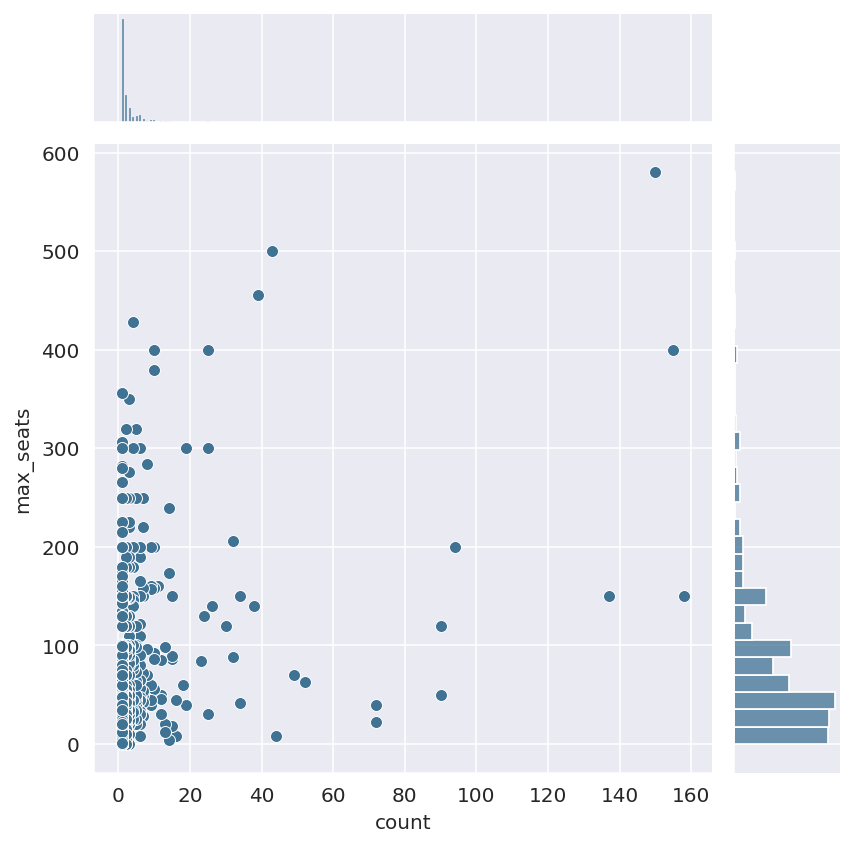

In [28]:
#совместное распределение:
sns.jointplot(x="count", y="max_seats", data=name_seats, color='#407294');

Расчет максимального количества мест по типу обьектов:

Для сетевых заведений характерно: много заведений с небольшим числом посадочных мест в каждом и мало заведений с большим количеством посадочных мест.

Вывод: если заведение сети единственное в городе, лучше, чтобы в нем было достаточно мест, а если заведений много, стоит ограничиться небольшим количеством посадочных мест.


### Cреднее количество посадочных мест для каждого вида объекта

In [29]:
# группировка данных по типу объектов по посадочным местам
type_grouped = rest.groupby('object_type')['number'].mean().reset_index().sort_values('number', ascending=False).round(2)
display(type_grouped)

,object_type,number
8,столовая,130.34
7,ресторан,96.88
1,буфет,51.43
0,бар,43.53
3,кафе,39.79
6,предприятие быстрого обслуживания,20.81
4,кафетерий,9.18
2,закусочная,7.85
5,магазин (отдел кулинарии),5.59


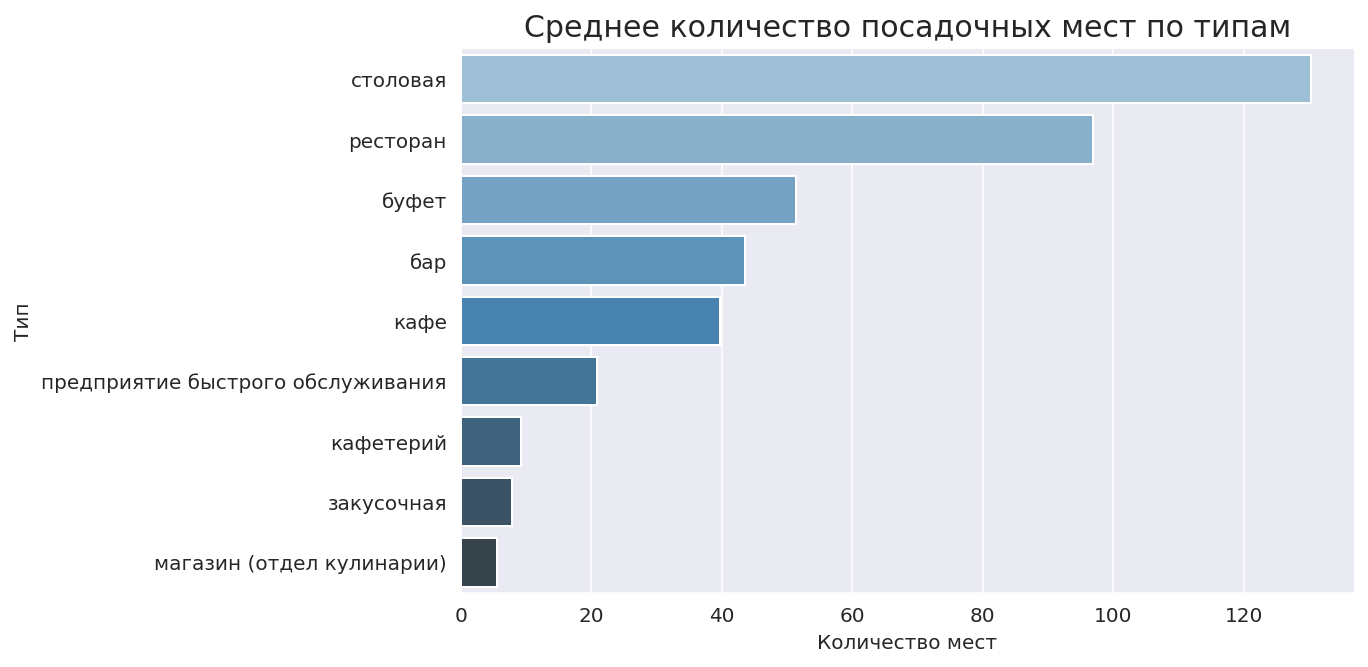

In [30]:
# график среднего количества мест по типам оъектов 
bar, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='number', y='object_type', data=type_grouped, palette="Blues_d")

ax.set_title("Среднее количество посадочных мест по типам", fontsize=15)
ax.set_xlabel ("Количество мест")
ax.set_ylabel ("Тип")

sns.despine()

plt.show()

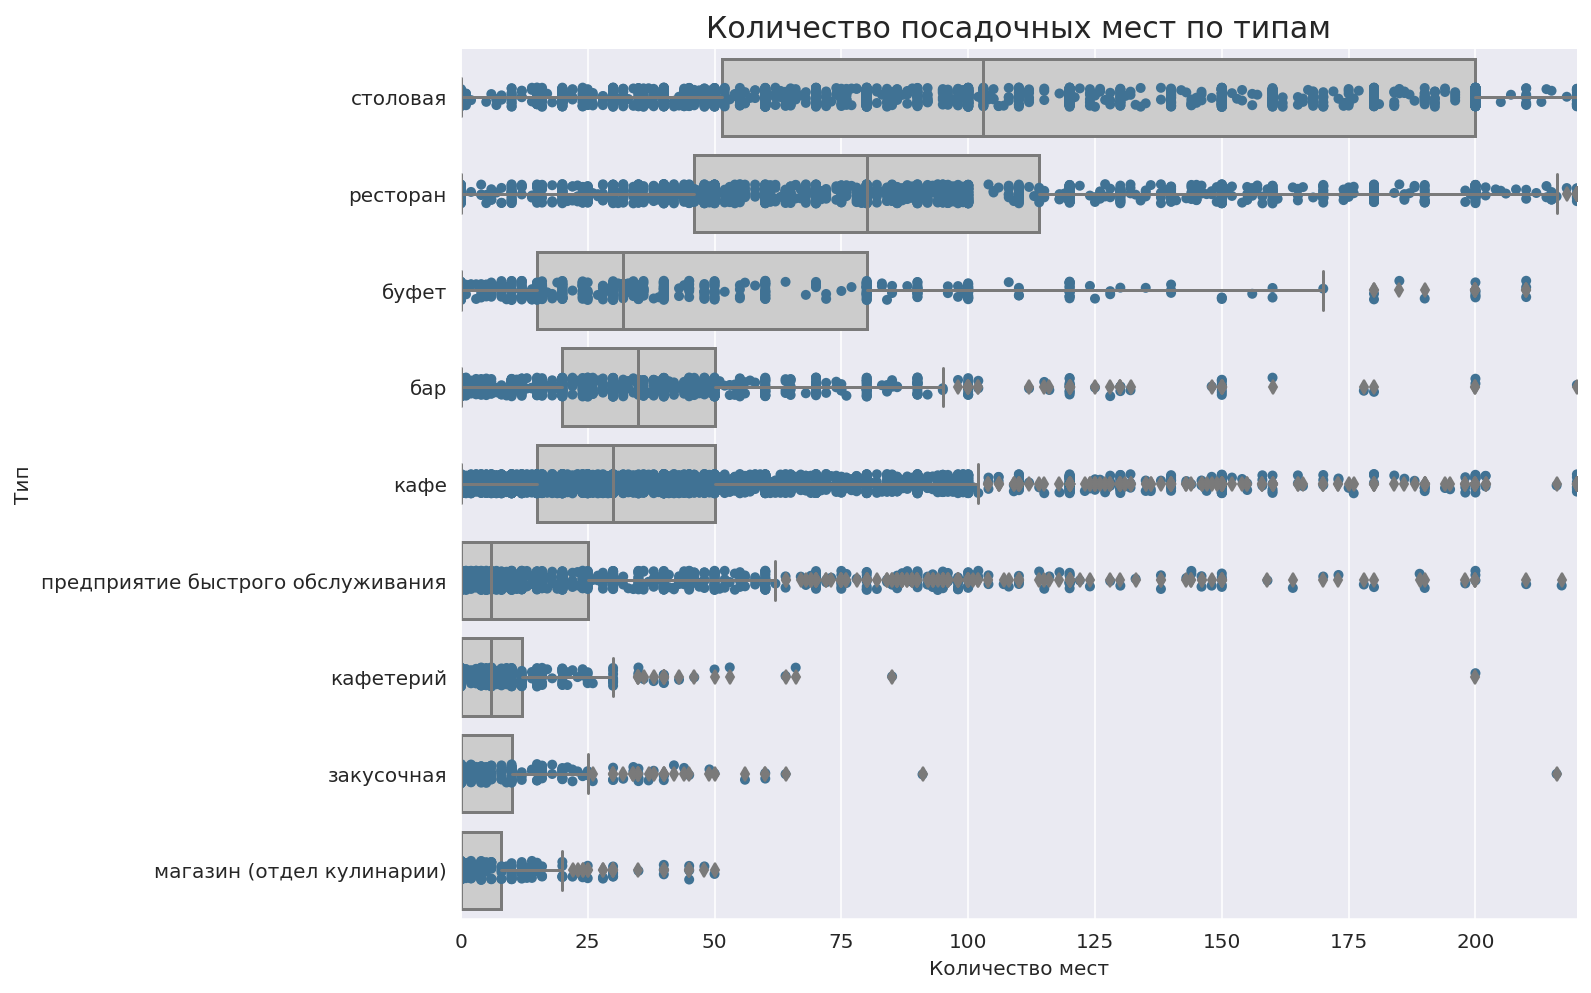

In [31]:
# boxplot и диаграмму рассеивания лля всех типов заведений:
bar, ax = plt.subplots(figsize=(10,8))

ax = sns.boxplot(x='number', y='object_type', data=rest, color='0.8', order=type_grouped['object_type'])
ax = sns.stripplot(x='number', y='object_type', data=rest, jitter=True, zorder=1, order=type_grouped['object_type'],\
                   color='#407294')

ax.set(xlim=(0, 220))

ax.set_title("Количество посадочных мест по типам", fontsize=15)
ax.set_xlabel ("Количество мест")
ax.set_ylabel ("Тип")

sns.despine()

plt.show()

Самое большое количество посадочных мест предоставляют столовые, рестораны и буфеты. Кафе обычно имеют от 15 до 50 мест, а рестораны от 50 до 115, столовые бывают от 50 до 200 мест

### Информацию об улице заведения

In [32]:
# разделяем адреса и превращаем в спики
rest['split_address'] = rest['address'].str.split(', ')
rest.head()

,id,object_name,chain,object_type,address,number,split_address
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,"[город Москва, улица Егора Абакумова, дом 9]"
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,"[город Москва, улица Талалихина, дом 2/1, корп..."
2,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0,"[город Москва, Абельмановская улица, дом 6]"
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0,"[город Москва, Абрамцевская улица, дом 1]"
4,119365,вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0,"[город Москва, Абрамцевская улица, дом 9, корп..."


In [33]:
# регулярное выражение для списка возможных наименований
street_list = ['улица','переулок','шоссе','проспект','площадь','проезд','аллея',\
               'бульвар','набережная','тупик', 'линия', 'квартал', 'микрорайон']

pattern = ''
for var in street_list:
    #                <...> улица    |     улица <...>    |       <...> улица <...>
    pattern += '[А-я0-9 -ё]+'+var+'$|^'+var+'[А-я0-9 -ё]+|[А-я0-9 -ё]+'+var+'[А-я0-9 -ё]+|'
    
#print(pattern)

In [34]:
# функция, которая выделяет улицу из ардеса:
def get_street(row):
    for el in row['split_address']:
        st = re.search(pattern, el).group()
        # возвращаем первый el, в котором нашли искомое выражение
        if st != '': return st

In [35]:
rest['street_name'] = rest.apply(get_street, axis=1)
# приведем все названия к нижнему регистру
rest['street_name']=rest['street_name'].str.lower()
display(rest.head())

,id,object_name,chain,object_type,address,number,split_address,street_name
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,"[город Москва, улица Егора Абакумова, дом 9]",улица егора абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,"[город Москва, улица Талалихина, дом 2/1, корп...",улица талалихина
2,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0,"[город Москва, Абельмановская улица, дом 6]",абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0,"[город Москва, Абрамцевская улица, дом 1]",абрамцевская улица
4,119365,вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0,"[город Москва, Абрамцевская улица, дом 9, корп...",абрамцевская улица


In [36]:
#найду долю пропусков
print('доля пропусков улиц:','{:.2%}'.format(rest['street_name'].isna().sum()/len(rest)))

доля пропусков улиц: 2.11%


In [37]:
#строки, где улица не найдена и изучим их:
rest.query('street_name.isna()').sample(10)

,id,object_name,chain,object_type,address,number,split_address,street_name
8520,77748,глория,False,ресторан,"город Москва, поселение Московский, посёлок Ул...",48.0,"[город Москва, поселение Московский, посёлок У...",None
5605,27515,школа 448,False,столовая,"город Москва, посёлок Акулово, дом 43А, строен...",156.0,"[город Москва, посёлок Акулово, дом 43А, строе...",None
12740,198111,пекарня,False,предприятие быстрого обслуживания,"город Москва, 87-й километр Московской Кольцев...",3.0,"[город Москва, 87-й километр Московской Кольце...",None
2518,25792,бар все свои,False,бар,"город Москва, город Зеленоград, корпус 1604",23.0,"[город Москва, город Зеленоград, корпус 1604]",None
8710,145078,сити пицца,True,предприятие быстрого обслуживания,"город Москва, город Зеленоград, корпус 2309А",45.0,"[город Москва, город Зеленоград, корпус 2309А]",None
2428,20102,му-му,True,кафе,"город Москва, город Зеленоград, корпус 403А",200.0,"[город Москва, город Зеленоград, корпус 403А]",None
6756,143079,wild bean cafe,False,кафе,"город Москва, 65-й километр Московской Кольцев...",10.0,"[город Москва, 65-й километр Московской Кольце...",None
10834,72081,столовая в школе 1194 корп.1548 (ранее увк 1639),False,столовая,"город Москва, город Зеленоград, корпус 1548",100.0,"[город Москва, город Зеленоград, корпус 1548]",None
9160,162612,столовая,False,столовая,"город Москва, поселение Щаповское, посёлок Щап...",108.0,"[город Москва, поселение Щаповское, посёлок Ща...",None
11693,188584,шаурма 24,False,магазин (отдел кулинарии),"город Москва, поселение Московский, деревня Са...",0.0,"[город Москва, поселение Московский, деревня С...",None


In [38]:
rest_data = rest.query('street_name.notna()')

In [39]:
### Топ-10 улиц по количеству объектов общественного питания
top_10_street = rest_data['street_name'].value_counts().reset_index().head(10)
top_10_street.columns=['street_name','count']
top_10_street.head(10)

,street_name,count
0,проспект мира,203
1,профсоюзная улица,182
2,ленинградский проспект,172
3,пресненская набережная,167
4,варшавское шоссе,165
5,ленинский проспект,148
6,проспект вернадского,128
7,кутузовский проспект,114
8,каширское шоссе,111
9,кировоградская улица,108


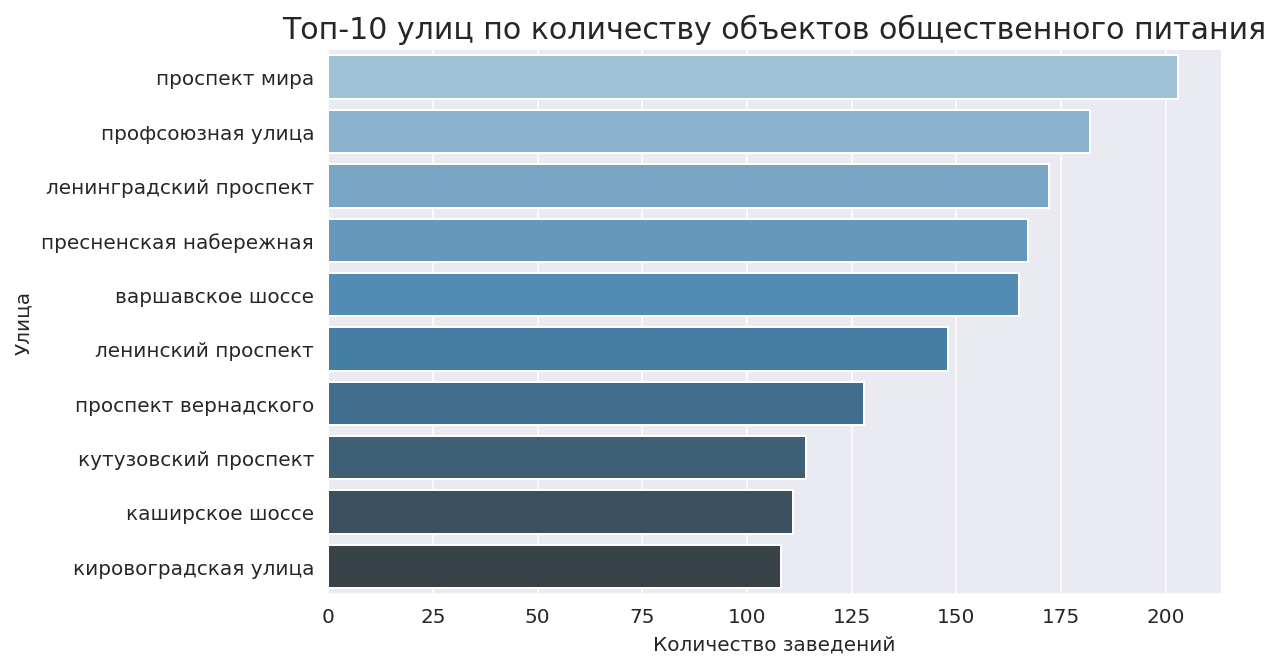

In [40]:
# график топ10 улиц
bar, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='count', y='street_name', data=top_10_street, palette="Blues_d")

ax.set_title("Топ-10 улиц по количеству объектов общественного питания", fontsize=15)
ax.set_xlabel ("Количество заведений")
ax.set_ylabel ("Улица")

sns.despine()

plt.show()

Перед нами одни из самых больших и оживленных улиц столицы!

### Районы Москвы

In [41]:
# подгружаем улицы москвы
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTBo228t6bHa9a0_9Ioek0wfVXhc20eWHu3HLAhQxbtw0JQiQBICzwKyB2plkfKti-YzfI0-HLxgI8e/pub?output=csv'
streets = pd.read_csv(url)
streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [42]:
streets = streets.rename(columns = {'streetname': 'street_name'})

In [43]:
streets['street_name']=streets['street_name'].str.lower()

In [44]:
rest_data_area = pd.merge(rest_data, streets, on='street_name', how='left')
rest_data_area.head(5)

,id,object_name,chain,object_type,address,number,split_address,street_name,areaid,okrug,area
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,"[город Москва, улица Егора Абакумова, дом 9]",улица егора абакумова,86.0,СВАО,Ярославский Район
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,"[город Москва, улица Талалихина, дом 2/1, корп...",улица талалихина,18.0,ЦАО,Таганский район
2,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,"[город Москва, улица Талалихина, дом 2/1, корп...",улица талалихина,117.0,ЮВАО,Нижегородский район
3,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,"[город Москва, улица Талалихина, дом 2/1, корп...",улица талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0,"[город Москва, Абельмановская улица, дом 6]",абельмановская улица,18.0,ЦАО,Таганский район


In [45]:
#сгруппируем улицы по районам
count_area = (rest_data_area.groupby(['street_name','area'])
              .agg({'street_name':'count'})
              .rename(columns = {'street_name':'count'})
              .sort_values(by = 'count', ascending = False))
count_area.head()

count
street_name   area                     
проспект мира Ярославский Район     203
              Алексеевский район    203
              Мещанский район       203
              Останкинский район    203
              Район Марьина роща    203

In [46]:
# какие районы пересекает каждая топовая улица?
top_streets = list(top_10_street['street_name'])
count_area2 = (rest_data_area.query('street_name in @top_streets')
               .groupby('street_name', as_index=False)
               .agg({'area':set})
               .sort_values(by = 'area', ascending = False))
               
count_area2

,street_name,area
0,варшавское шоссе,"{Район Чертаново Южное, Донской район, Нагорны..."
1,каширское шоссе,"{Район Москворечье-Сабурово, Район Нагатино-Са..."
2,кировоградская улица,"{Район Чертаново Центральное, Район Чертаново ..."
3,кутузовский проспект,"{Район Дорогомилово, Район Фили-Давыдково}"
4,ленинградский проспект,"{Район Сокол, Район Аэропорт, Хорошевский райо..."
5,ленинский проспект,"{Район Теплый Стан, Донской район, Район Гагар..."
6,пресненская набережная,{Пресненский район}
7,проспект вернадского,"{Район Гагаринский, Район Проспект Вернадского..."
8,проспект мира,"{Алексеевский район, Район Свиблово, Район Мар..."
9,профсоюзная улица,"{Район Теплый Стан, Район Черемушки, Район Кон..."


In [47]:
# Список районов через которые проходят наши топовые улицы:
areas = rest_data_area.query('street_name in @top_streets')
areas['area'].unique()

array(['Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Раменки',
       'Район Тропарево-Никулино', 'Район Гагаринский',
       'Ломоносовский район', 'Район Дорогомилово',
       'Район Фили-Давыдково', 'Район Москворечье-Сабурово',
       'Район Орехово-Борисово Южное', 'Район Орехово-Борисово Северное',
       'Район Аэропорт', 'Район Беговой', 'Хорошевский район',
       'Район Сокол', 'Обручевский район', 'Район Теплый Стан',
       'Район Якиманка', 'Алексеевский район', 'Ярославский Район',
       'Район Марьина роща', 'Останкинский район', 'Район Ростокино',
       'Район Свиблово', 'Мещанский район', 'Академический район',
       'Район Черемушки', 'Район Ясенево', 'Район Коньково',
       'Пресненский район'], dtype=object)

In [48]:
print('Количесво районов, которые пересекают топовые улицы:', len(areas['area'].unique()))

Количесво районов, которые пересекают топовые улицы: 37


In [49]:
# а теперь в числовом варианте
count_area3 = (rest_data_area.query('street_name in @top_streets')
               .groupby('street_name', as_index=False)
               .agg({'area':'nunique'})
               .sort_values(by = 'area', ascending = False))
               
count_area3

,street_name,area
0,варшавское шоссе,8
5,ленинский проспект,8
8,проспект мира,7
9,профсоюзная улица,6
7,проспект вернадского,5
1,каширское шоссе,4
4,ленинградский проспект,4
2,кировоградская улица,3
3,кутузовский проспект,2
6,пресненская набережная,1


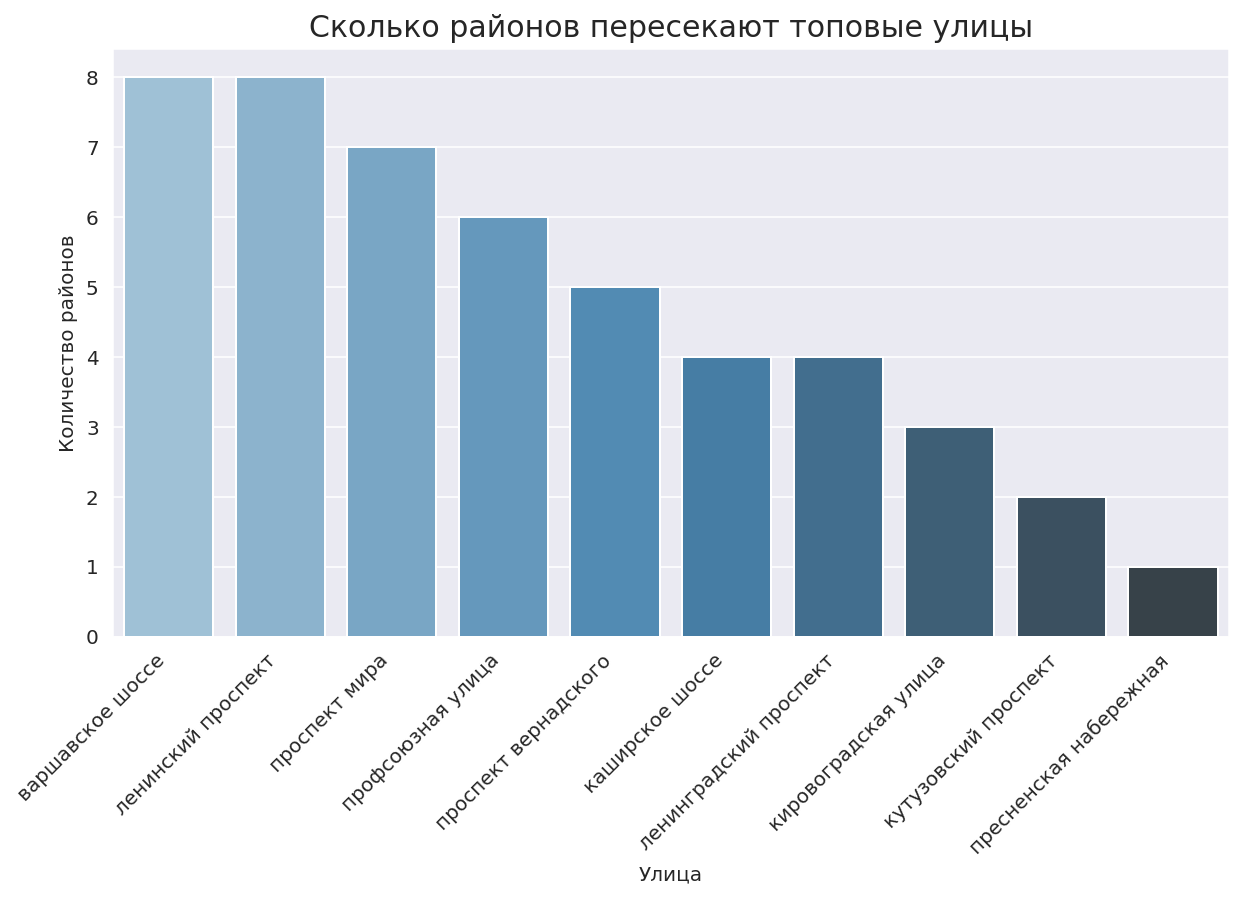

In [50]:
# и снова график!)
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="street_name", y = 'area', data=count_area3, palette="Blues_d")

ax.set_title("Сколько районов пересекают топовые улицы", fontsize=15)
ax.set_xlabel("Улица")
ax.set_ylabel("Количество районов")
bar.autofmt_xdate(rotation=45)
plt.show()

In [51]:
# посмотрим в каких районах больше всего улиц с заведениями
top_areas = rest_data_area.groupby('area')['street_name'].nunique().sort_values(ascending=False).reset_index().head(10)
top_areas

,area,street_name
0,Тверской район,106
1,Пресненский район,88
2,Таганский район,82
3,Басманный район,80
4,Район Хамовники,74
5,Мещанский район,49
6,Даниловский район,49
7,Район Замоскворечье,46
8,Район Арбат,45
9,Красносельский район,40


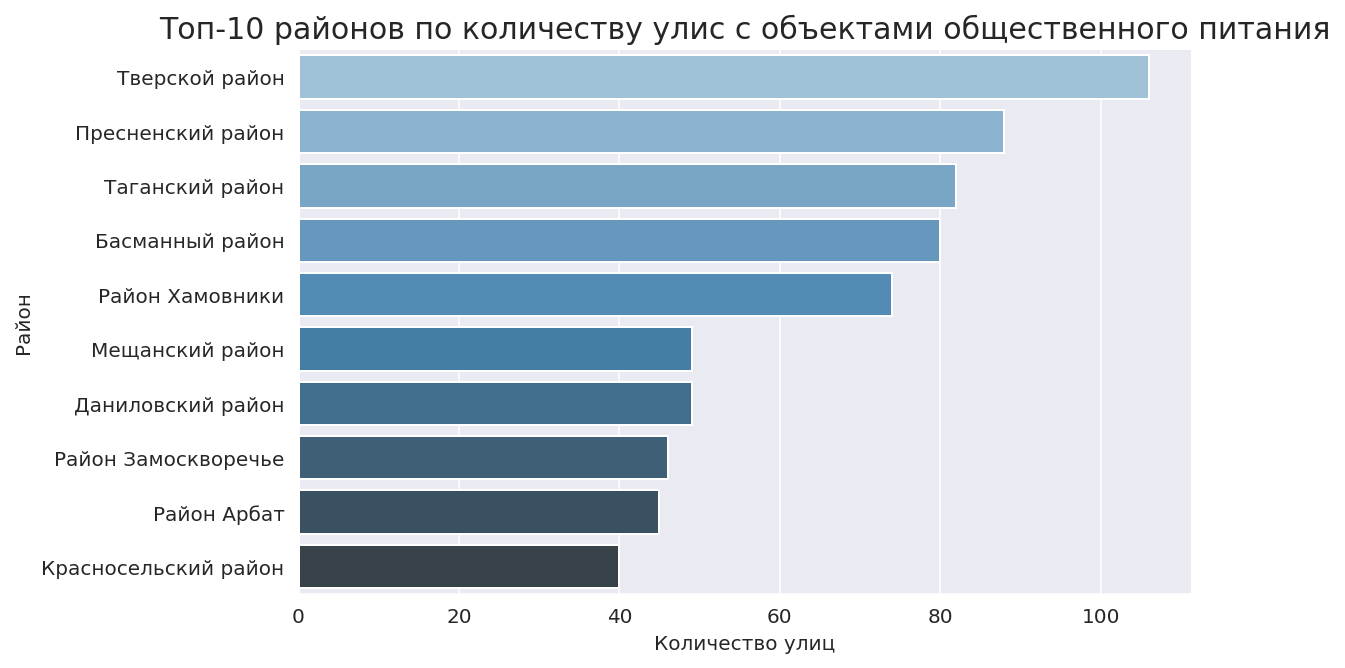

In [52]:
bar, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x='street_name', y='area', data=top_areas, palette="Blues_d")

ax.set_title("Топ-10 районов по количеству улис с объектами общественного питания", fontsize=15)
ax.set_xlabel ("Количество улиц")
ax.set_ylabel ("Район")

sns.despine()

plt.show()

Самые популярные улицы оказались еще и самыми большими - пересекают несколько районов Москвы, да и если посмотреть, то "улиц" в списке всего две, остальное это шоссе и проспекты, и одна набережная. 
Улицы, где больше всего заведений пересекают 37 районов Москвы. Так же выделили самые богатые районы по количеству улиц с объектами.

### Число улиц с одним объектом общественного питания

In [53]:
only_one = rest_data.groupby('street_name')['id'].count().reset_index().query('id == 1')
print('Улиц с одним объектом общественного питания:', len(only_one))

Улиц с одним объектом общественного питания: 549


In [54]:
# узнаем, в каких районах Москвы находятся эти улицы:
only_one_area = only_one.merge(streets, left_on='street_name', right_on='street_name')
only_one_area = (only_one_area.groupby('area')['street_name']
                 .count()
                 .reset_index()
                 .sort_values('street_name', ascending=False).head(10))
only_one_area

,area,street_name
95,Таганский район,27
81,Район Хамовники,26
3,Басманный район,25
96,Тверской район,20
21,Пресненский район,20
22,Район Арбат,18
52,Район Марьина роща,18
13,Мещанский район,16
34,Район Замоскворечье,14
74,Район Соколиная Гора,12


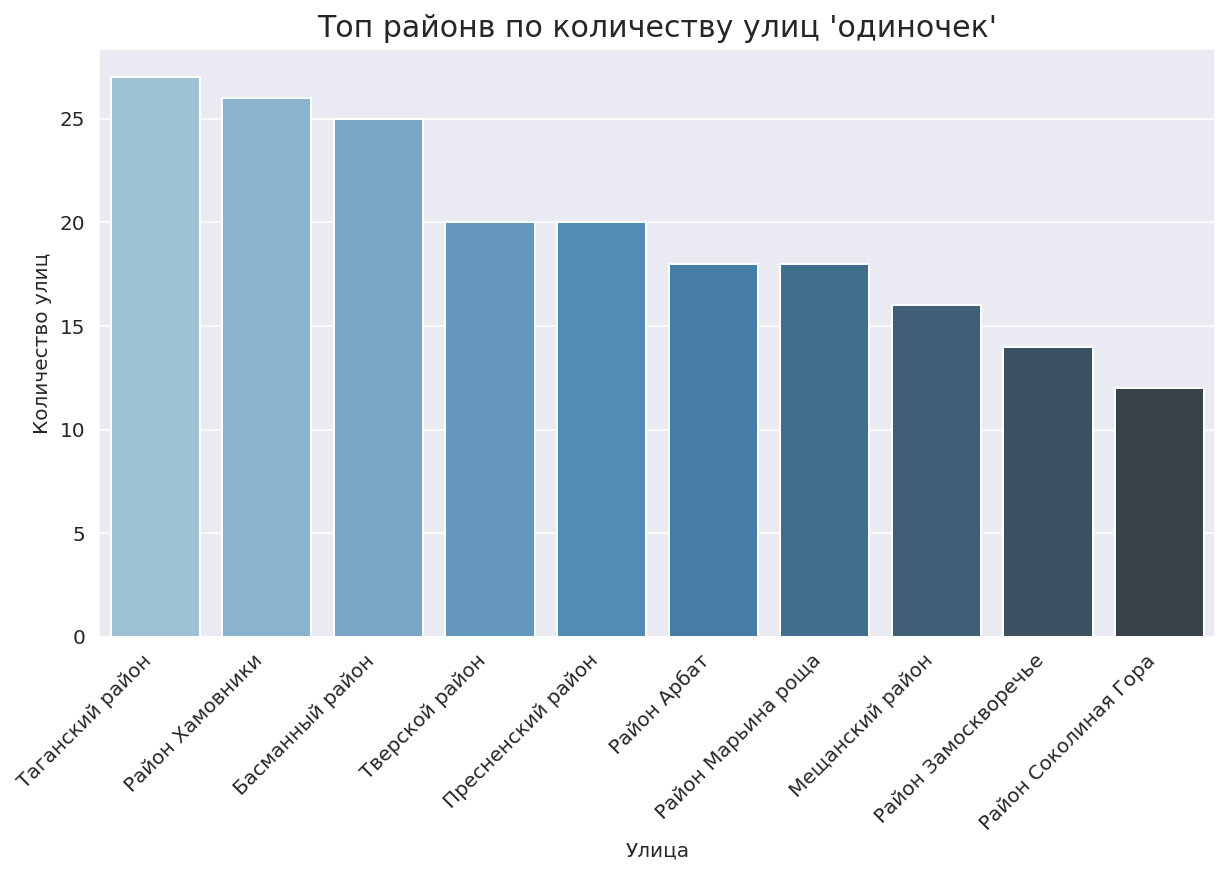

In [55]:
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="area", y = 'street_name', data=only_one_area, palette="Blues_d")

ax.set_title("Топ районв по количеству улиц 'одиночек'", fontsize=15)
ax.set_xlabel("Улица")
ax.set_ylabel("Количество улиц")
bar.autofmt_xdate(rotation=45)
plt.show()

Я определила топ районов по количесву улиц "одиночек", Больше всего улиц находтся в центре. Это не удивительно - на коротких центральных улицах не поместится столько заведений, как на проспектах и шоссе из предыдущей таблицы.

## Вывод

Краткий обзор проведённой работы:

Загрузили данные, убедились в корректности типов, отсутствии пропусков и дубликатов;

провели анализ данных:

исследовали соотношение видов объектов, особенности сетевых заведений;
среднее количество посадочных мест;

особенности заведений в зависимости от расположения.

Главные выводы:

наиболее популярные заведения - кафе, столовые, рестораны и предприятия быстрого питания;

меньше 20 процентов заведений являются сетевыми;

почти нет сетевых столовых - это идея для нового проекта;

если сетевое заведение сети единственное в городе, лучше, чтобы в нем было достаточно мест, а если заведений много, стоит ограничиться небольшим количеством посадочных мест;

больше всего улиц с единственным объектом питания находятся в центре, а улицы с большим числом заведений - на окраинах, особенно на юге города.

Рекомендации:

вид заведения - кафе или ресторан. Это самые популярные заведения вне зависимости от принадлежности к сети;

район расположения - вне центра города на оживленной улице. Соседство с другими заведениями поможет с привлечением клиентов на начальных порах - случайные прохожие, выбирающие, где поесть, наверняка обратят внимание на "роботов оффициантов";

так так заведение будет располагаться на популярной улице и наше заведение будет уникальным, рекомендуемое количество посадочных мест - от 80 до 100.

Презентация: <https://drive.google.com/file/d/1GtmeUhIumAqRYymoQi1ID_VHrKerv5DS/view?usp=sharing>